In [301]:
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date 
import sklearn

In [302]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Assignment Part 1 

Read the Dataset provided

In [303]:
df = pd.read_excel('Data+ethics+assignment+-+dataset.xlsx')
df.head()

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,Member's Date of Birth,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number
0,6422558,M27458,"15669789, 15669830, 34993978, 15669856, 775378...",28-09-2014,"Boiled Rice, Other Rice Products, Mosquito Rep...",Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",tina64@example.org,(981)315-0970,Male,16-02-1996,Silver,0,620,PayPal,"Unit 9405 Box 3979, DPO AA 03716",Shipped,NaN
1,6422636,M39021,"7580802, 15668453, 15668375, 15668379, 1566976...",28-09-2014,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",lisahorton@example.com,(808)745-0768x733,Male,30-04-1911,Gold,8,618,Credit Card,"PSC 8209, Box 7092, APO AP 28287",Delivered,3.509367e+15
2,6423338,M36366,"15668469, 15668478, 7586314, 15669800, 1566978...",28-09-2014,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",gordoncourtney@example.com,(912)707-8569x14006,Male,1924-10-02 00:00:00,Bronze,3,295,Cash,"666 Jennifer Mills Suite 089, New Travis, VI 9...",Shipped,NaN
3,6423534,M25900,"34987356, 15670251, 7585573, 34992815",28-09-2014,"Facial Tissues, Organic F&V, Cakes, Cookies",Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",ibell@example.com,(722)989-7498,Female,1953-08-01 00:00:00,Gold,7,881,Credit Card,"0279 Jason Forges Apt. 497, Andrewsborough, NV...",Pending,2.581849e+15
4,6423959,M57354,"34989501, 7580811, 7569799, 34938526",29-09-2014,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",nancy96@example.net,972-960-4816x5421,Male,1951-11-12 00:00:00,Bronze,5,595,Cash,"5038 Shane Rue Apt. 867, East Kenneth, AK 08214",Delivered,NaN


check how many records are present and how many features are present

In [304]:
df.shape

(8387, 18)

Check the data in each column

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order                      8387 non-null   int64  
 1   Member                     8387 non-null   object 
 2   SKU                        8387 non-null   object 
 3   Created On                 8387 non-null   object 
 4   Description                8387 non-null   object 
 5   Member's Full Name         8387 non-null   object 
 6   Member's Address           8387 non-null   object 
 7   Member's Email             8387 non-null   object 
 8   Member's Phone Number      8387 non-null   object 
 9   Member's Gender            8387 non-null   object 
 10  Member's Date of Birth     8387 non-null   object 
 11  Member's Membership Level  8387 non-null   object 
 12  Member's Purchase History  8387 non-null   int64  
 13  Order Value                8387 non-null   int64

We see that date columns are all object, we shall convert them into Date format

### Data Pre processing

convert the object datatype for the columns "Created On" and "Date of Birth" to datetime

In [306]:
#Convert the Created Date to Date format
df['corrected_Created_date'] = pd.to_datetime(df['Created On'], format='%d-%m-%Y',errors='coerce')

In [307]:
#Convert the Created Date to Date format
df['Created_date_yy'] = pd.to_datetime(df['Created On'], format='%Y-%m-%d',errors='coerce')

In [308]:
df.corrected_Created_date.fillna(df.Created_date_yy, inplace=True)

In [309]:
# drop the original column which has object data type
df.drop(['Created_date_yy'],inplace=True, axis=1)

In [310]:
#Convert the Date of birth to Date format
df['corrected_members_dob'] = pd.to_datetime(df['Member\'s Date of Birth'], format='%d-%m-%Y',errors='coerce')
df['member_dob_yy'] = pd.to_datetime(df['Member\'s Date of Birth'], format='%Y-%m-%d',errors='coerce')
df.corrected_members_dob.fillna(df.member_dob_yy, inplace=True)
df.drop(['member_dob_yy'],inplace=True, axis=1)

In [311]:
# Find the total items bought by each members
df['Total_Items'] = [len(str(x).split(',')) for x in df.SKU]

In [312]:
# Calculate the age of the customers from Date of birth
def age(born):
    #born = datetime.strptime(born, "%Y/%m/%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

df['Age'] = df['corrected_members_dob'].apply(age)

view the statistics of the data

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order                      8387 non-null   int64         
 1   Member                     8387 non-null   object        
 2   SKU                        8387 non-null   object        
 3   Created On                 8387 non-null   object        
 4   Description                8387 non-null   object        
 5   Member's Full Name         8387 non-null   object        
 6   Member's Address           8387 non-null   object        
 7   Member's Email             8387 non-null   object        
 8   Member's Phone Number      8387 non-null   object        
 9   Member's Gender            8387 non-null   object        
 10  Member's Date of Birth     8387 non-null   object        
 11  Member's Membership Level  8387 non-null   object        
 12  Member

## understand the buying pattern and trends of the existing customers

Filter out only those columns that are needed to find the buying pattern

In [314]:
filt_df = df[['Order','Member','corrected_Created_date','Description','Total_Items','Member\'s Full Name','Member\'s Address',
             'Member\'s Gender','corrected_members_dob','Age','Member\'s Membership Level','Member\'s Purchase History',
             'Order Value','Payment Method','Order Status']]

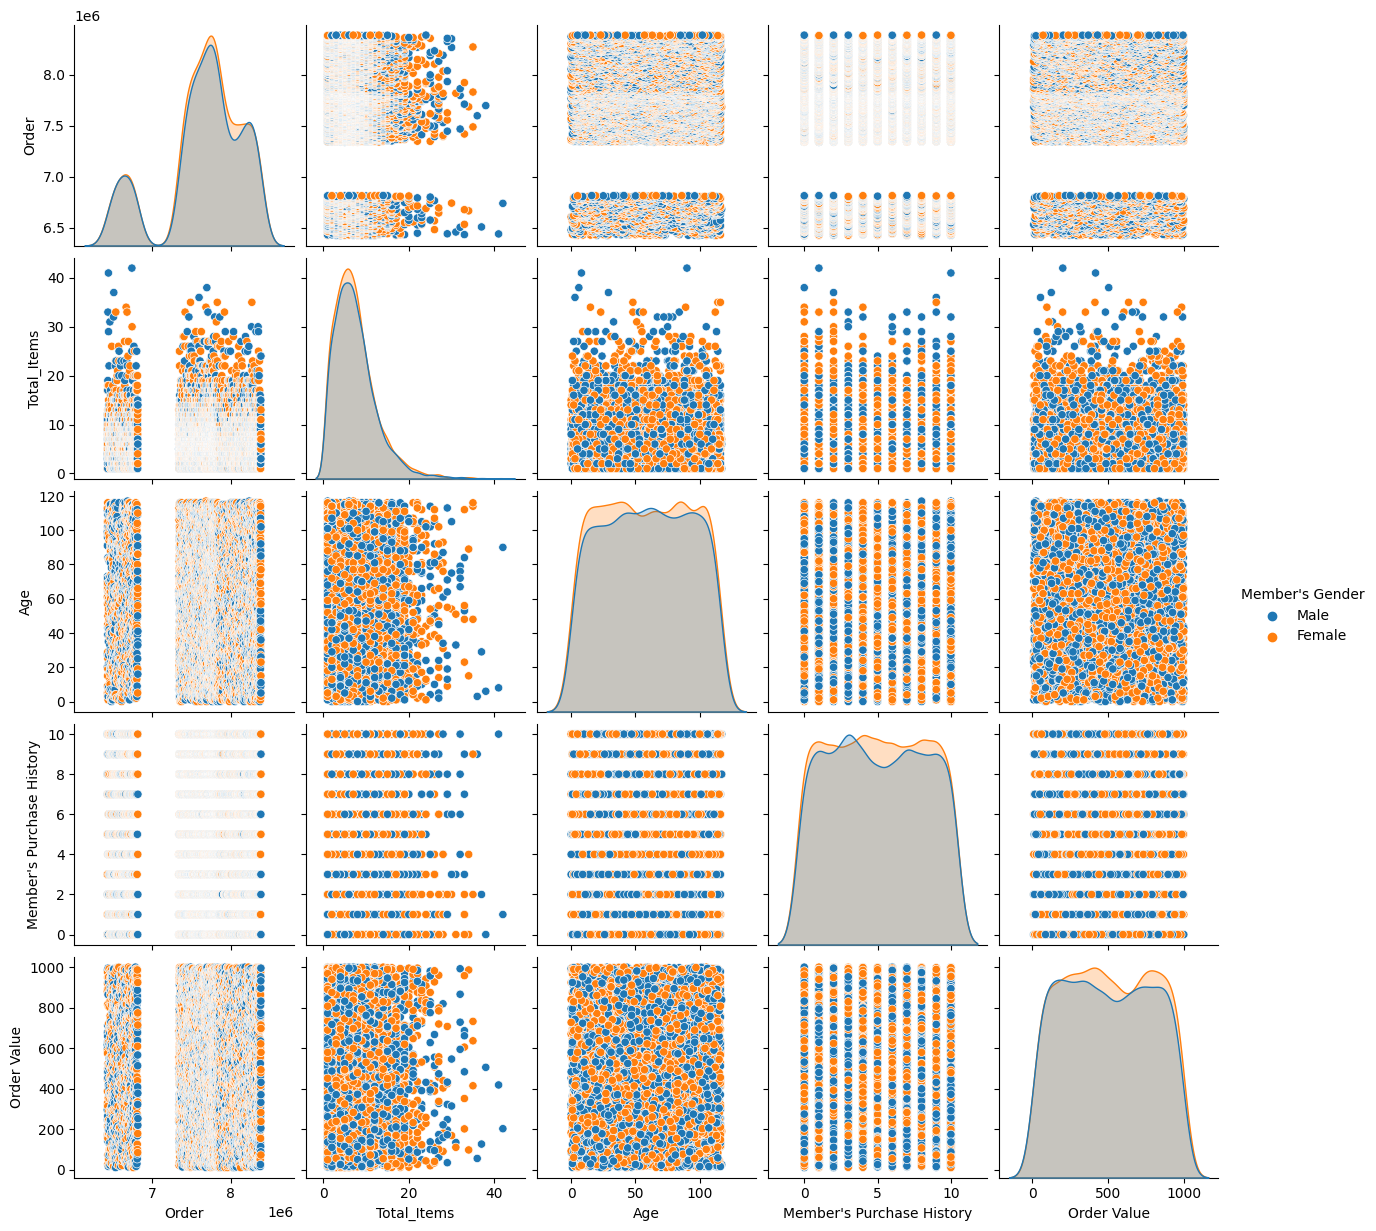

In [315]:
seaborn.pairplot(filt_df, hue ='Member\'s Gender')

From the pair plot of the Orders, it's evident that both Female and Male customers have placed a similar number of orders. However, the Female customers have generated slightly higher Order value.


#### Spending pattern of customer based on number of orders placed on each day

In [316]:
pd.pivot_table(filt_df,values='Order',index='corrected_Created_date',columns='Member',aggfunc='count')

Member,M04158,M08075,M09303,M09736,M12050,M12127,M14746,M16218,M16611,M18732,...,M78720,M82651,M84827,M86304,M86572,M90375,M91098,M96365,M99030,M99206
corrected_Created_date,,,,,,,,,,,,,,,,,,,,,
2011-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='corrected_Created_date'>

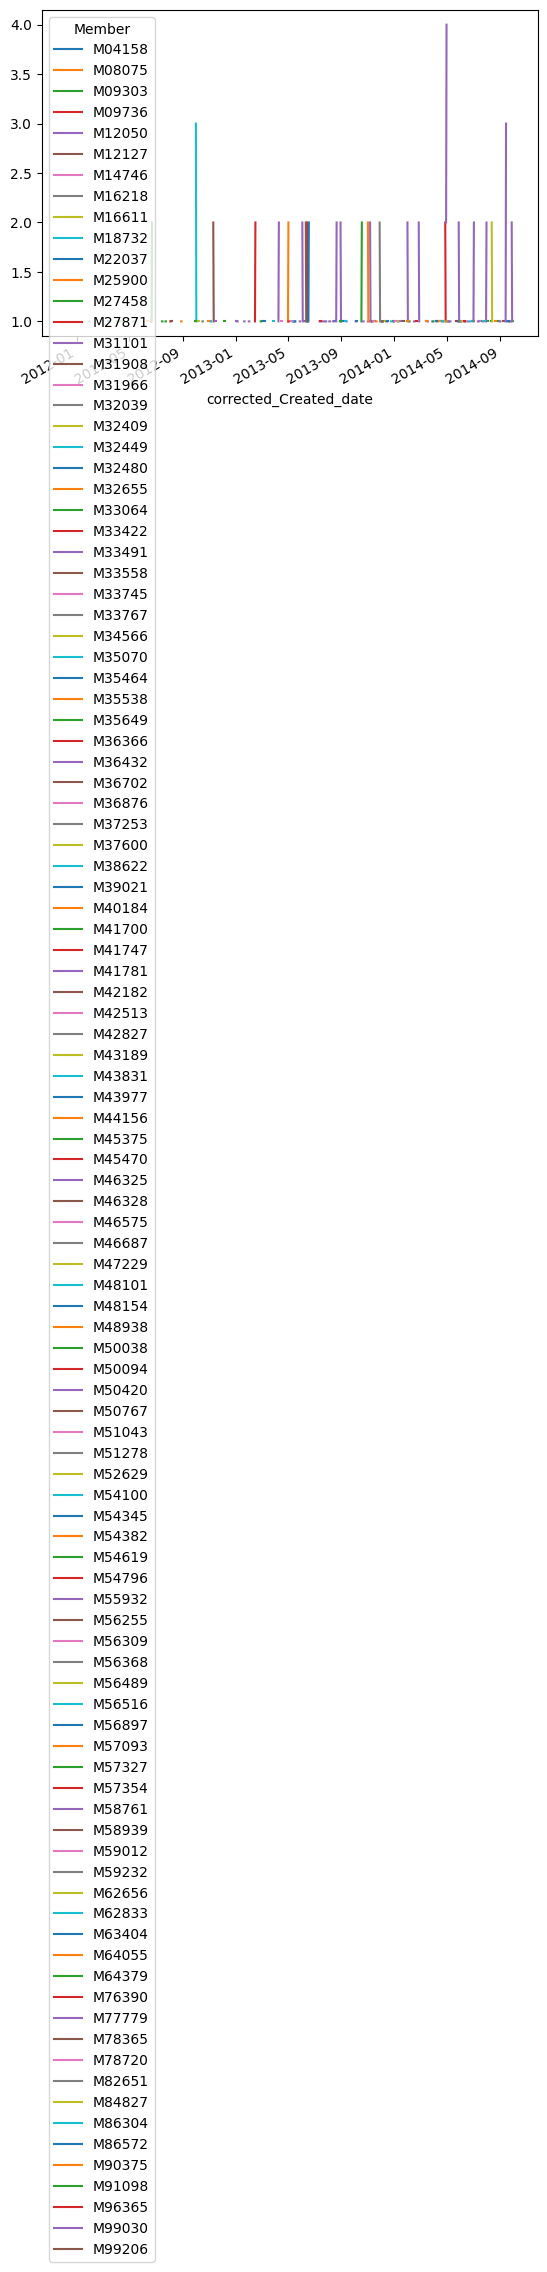

In [317]:
pd.pivot_table(filt_df,values='Order',index='corrected_Created_date',columns='Member',aggfunc='count').plot()

Analyzing the number of orders over time uncovers seasonal trends, purchase spikes, and individual customer purchasing behavior. 
The graph illustrates higher order volumes in May and September. Additionally, customers with member IDs M08075, M18732, and M31101 consistently place the most orders. These customers are unlikely to churn.

### Calculate the moving average to find buying patter of each customer

In [318]:
member_df = filt_df.copy()
member_df.set_index('corrected_Created_date',inplace=True)
member_df.head()

,Order,Member,Description,Total_Items,Member's Full Name,Member's Address,Member's Gender,corrected_members_dob,Age,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Order Status
corrected_Created_date,,,,,,,,,,,,,,
2014-09-28,6422558,M27458,"Boiled Rice, Other Rice Products, Mosquito Rep...",9,Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",Male,1996-02-16,28,Silver,0,620,PayPal,Shipped
2014-09-28,6422636,M39021,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",11,Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",Male,1911-04-30,112,Gold,8,618,Credit Card,Delivered
2014-09-28,6423338,M36366,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",12,Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",Male,1924-10-02,99,Bronze,3,295,Cash,Shipped
2014-09-28,6423534,M25900,"Facial Tissues, Organic F&V, Cakes, Cookies",4,Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",Female,1953-08-01,70,Gold,7,881,Credit Card,Pending
2014-09-29,6423959,M57354,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",4,Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",Male,1951-11-12,72,Bronze,5,595,Cash,Delivered


#### Group by Member and calculate the moving average of total items bought by each customer over a 30-day window.


In [319]:
member_df['SMA30'] = member_df.groupby('Member')['Total_Items'].transform(lambda x: x.rolling(30).mean())
member_df.dropna(inplace=True)
member_df

,Order,Member,Description,Total_Items,Member's Full Name,Member's Address,Member's Gender,corrected_members_dob,Age,Member's Membership Level,Member's Purchase History,Order Value,Payment Method,Order Status,SMA30
corrected_Created_date,,,,,,,,,,,,,,,
2014-07-19,6691796,M09303,"Banana, Ayurvedic Food, Jaggery, Organic Brand...",5,Malik Taylor,"485 Shaun Ford, Coxside, HI 69910",Female,1953-12-31,70,Gold,9,458,Cash,Shipped,4.166667
2014-07-22,6699324,M36432,Beans,1,Catherine Blackburn,"3011 Joseph Terrace, Wrightfurt, SC 16650",Male,1922-06-10,101,Silver,8,104,Credit Card,Shipped,4.666667
2014-07-22,6699488,M36432,Millet flour,1,Cathy Farrell,"03744 Myers Flats, East Maria, WA 51966",Female,2014-10-07,9,Gold,8,787,Cash,Delivered,4.666667
2014-07-22,6699907,M36432,"Whole Spices, Whole Spices, Gourd & Cucumber, ...",7,Eric Yoder,"81730 Roger Brook, Rodriguezside, VI 54269",Female,1977-02-04,47,Bronze,2,380,Cash,Pending,4.700000
2014-07-22,6701806,M09303,"Snacks, Cream Biscuits, Whole Spices, Gourd & ...",8,Howard Ross,"6325 Carlson Isle, Jacobbury, WI 21222",Female,1969-07-28,54,Silver,4,256,PayPal,Pending,4.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-20,8387964,M90375,"Organic F&V, Other Rice Products, Other Vegeta...",3,April Nelson,"6346 Faulkner Oval Suite 220, Jeffreyborough, ...",Male,1987-05-20,36,Bronze,3,370,Cash,Delivered,4.566667
2013-11-20,8387967,M44156,"Brinjals, Brinjals, Banana, Gourd & Cucumber, ...",6,Deborah Brown,"051 Schwartz Causeway Suite 430, Rothport, CO ...",Male,2013-04-28,11,Gold,2,995,Cash,Shipped,7.266667
2013-11-19,8388196,M91098,"Sunflower Oils, Boiled Rice, Whole Spices, Mil...",7,Tyler Velez,"837 Rodriguez Burg, North Roy, NV 81841",Female,1947-01-11,77,Silver,8,697,PayPal,Pending,7.300000


<Axes: xlabel='corrected_Created_date'>

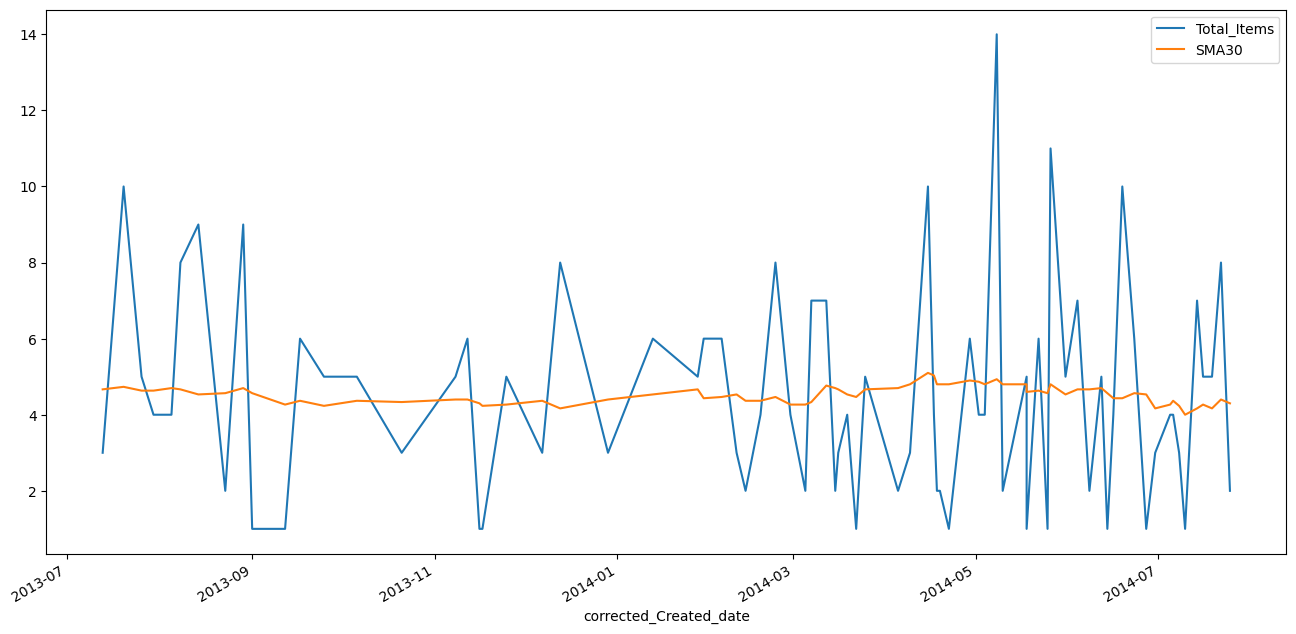

In [320]:
cust1_df = member_df[member_df['Member'] == 'M09303']
cust1_df[['Total_Items', 'SMA30']].plot(label='Member',figsize=(16, 8))

The spend pattern for customer 'M09303'shows more upward peaks which indicates that this customer purchases more frequently.

#### Customer Segmentation based on order value

In [321]:
age18_25 = filt_df.Age[(filt_df.Age <= 25) & (filt_df.Age >= 18)]
age26_35 = filt_df.Age[(filt_df.Age <= 35) & (filt_df.Age >= 26)]
age36_45 = filt_df.Age[(filt_df.Age <= 45) & (filt_df.Age >= 36)]
age46_55 = filt_df.Age[(filt_df.Age <= 55) & (filt_df.Age >= 46)]
age55above = filt_df.Age[filt_df.Age >= 56]

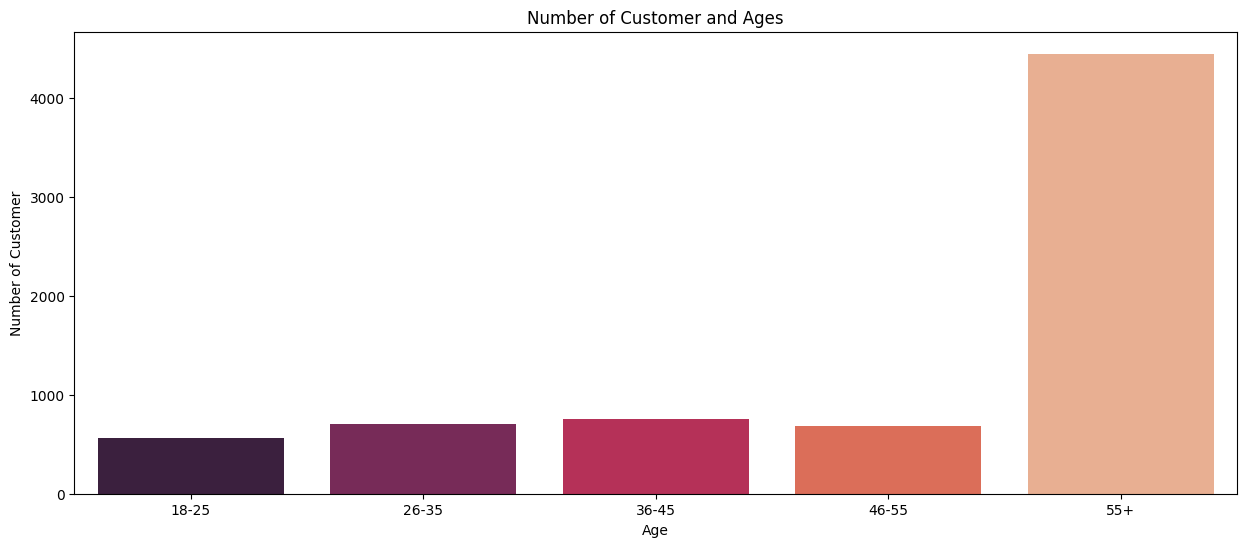

In [322]:
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

We observe the distribution of customers based on their ages. Notably, customers in the age group above 55 are the predominant purchasers.

#### Customer vs Order Values

In [323]:
filt_df['Order Value'].min()

10

In [324]:
filt_df['Order Value'].max()

1000

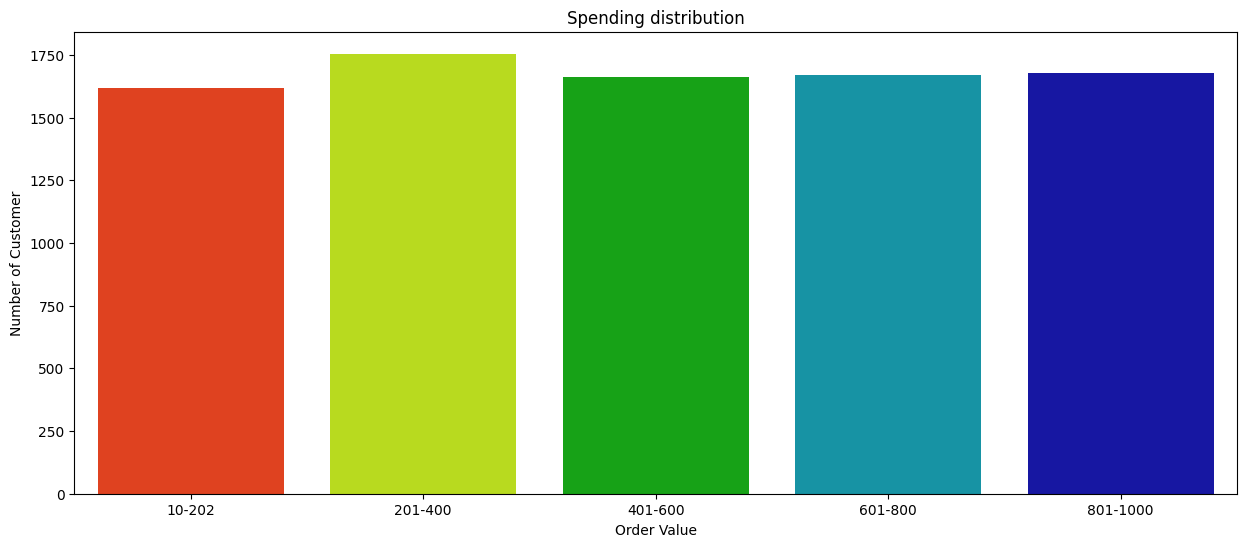

In [325]:
ss10_200 = filt_df["Order Value"][(filt_df["Order Value"] >= 10) & (filt_df["Order Value"] <= 200)]
ss201_400 = filt_df["Order Value"][(filt_df["Order Value"] >= 201) & (filt_df["Order Value"] <= 400)]
ss401_600 = filt_df["Order Value"][(filt_df["Order Value"] >= 401) & (filt_df["Order Value"] <= 600)]
ss601_800 = filt_df["Order Value"][(filt_df["Order Value"] >= 601) & (filt_df["Order Value"] <= 800)]
ss801_1000 = filt_df["Order Value"][(filt_df["Order Value"] >= 801) & (filt_df["Order Value"] <= 1000)]

ssx = ["10-202", "201-400", "401-600", "601-800", "801-1000"]
ssy = [len(ss10_200.values), len(ss201_400.values), len(ss401_600.values), len(ss601_800.values), len(ss801_1000.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending distribution")
plt.xlabel("Order Value")
plt.ylabel("Number of Customer")
plt.show()

The majority of customers spend within the range of $200 to $400.


#### Customer grouping based on purchase behaviour

In [326]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cust_seg_df = filt_df[['Member\'s Gender','Age','Member\'s Membership Level','Order Value']]
cust_seg_df['Gender_Encoded'] = label_encoder.fit_transform(cust_seg_df['Member\'s Gender'])
cust_seg_df['Membership_Encoded'] = label_encoder.fit_transform(cust_seg_df['Member\'s Membership Level'])
cust_seg_df.drop(['Member\'s Gender','Member\'s Membership Level'],axis=1,inplace=True)
cust_seg_df.head()

,Age,Order Value,Gender_Encoded,Membership_Encoded
0,28,620,1,2
1,112,618,1,1
2,99,295,1,0
3,70,881,0,1
4,72,595,1,0


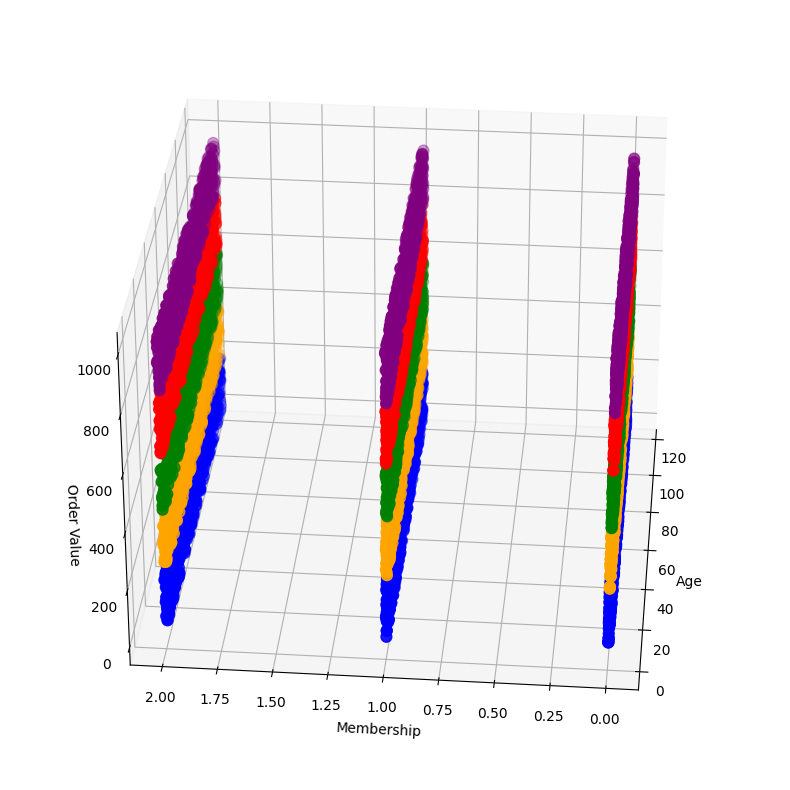

In [327]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(cust_seg_df)
cust_seg_df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 0], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 0], cust_seg_df["Order Value"][cust_seg_df.label == 0], c='blue', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 1], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 1], cust_seg_df["Order Value"][cust_seg_df.label == 1], c='red', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 2], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 2], cust_seg_df["Order Value"][cust_seg_df.label == 2], c='green', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 3], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 3], cust_seg_df["Order Value"][cust_seg_df.label == 3], c='orange', s=60)
ax.scatter(cust_seg_df.Age[cust_seg_df.label == 4], cust_seg_df["Membership_Encoded"][cust_seg_df.label == 4], cust_seg_df["Order Value"][cust_seg_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Membership")
ax.set_zlabel('Order Value')
plt.show()

In [328]:
pd.pivot_table(cust_seg_df,values='Order Value',index='Membership_Encoded',columns='label',aggfunc=np.mean)

label,0,1,2,3,4
Membership_Encoded,,,,,
0,110.347368,706.314815,500.692029,305.690114,898.658491
1,108.959292,705.698473,503.366723,307.667785,900.802920
2,110.690519,710.843594,503.844278,307.289608,903.204586


We have clustered customers based on age, membership, and order value using Kmeans clustering. It's evident that customers with Gold(1) and Silver(2) membership contribute to high order values. Additionally, individuals belonging to Cluster Group 1 and 3 generate more customer lifetime value (CLV) for the company.


#### Analyze customer behavior based on Recency, Frequency, and Monetary value

In [329]:
filt_df['corrected_Created_date'].min()

Timestamp('2011-12-03 00:00:00')

In [330]:
recency_df = filt_df.groupby(['Member\'s Full Name'])['corrected_Created_date'].max().reset_index()
current_date = datetime.now()
recency_df['Recency (Days)'] = (current_date - recency_df['corrected_Created_date']).dt.days
recency_df.head()

,Member's Full Name,corrected_Created_date,Recency (Days)
0,Aaron Arellano,2014-01-07,3765
1,Aaron Benton,2013-07-18,3938
2,Aaron Gallagher,2014-03-12,3701
3,Aaron Harrison,2013-03-11,4067
4,Aaron Hayes,2013-09-08,3886


In [331]:
recency_df.describe()

,corrected_Created_date,Recency (Days)
count,7947,7947.000000
mean,2013-10-01 00:59:26.024914944,3862.958727
min,2011-12-03 00:00:00,3493.000000
25%,2013-04-19 00:00:00,3664.000000
50%,2013-10-24 00:00:00,3840.000000
75%,2014-04-18 00:00:00,4028.000000
max,2014-10-06 00:00:00,4531.000000
std,NaN,236.378379


Recency determines how recently a customer made a purchase. We will utilize this data to further segment customers into churned or not churned categories.


In [332]:
frequency_df = filt_df.groupby('Member\'s Full Name')['corrected_Created_date'].count().reset_index()

In [333]:
frequency_df.columns = ['Member\'s Full Name', 'Purchase Frequency']

In [334]:
frequency_df.describe()

,Purchase Frequency
count,7947.000000
mean,1.055367
std,0.269154
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


Frequency of purchase shows how often customers make a purchase. We will use this data to further segment if they churn or not churn

In [335]:
monetary_df = filt_df.groupby('Member\'s Full Name')['Order Value'].sum().reset_index()
monetary_df.columns = ['Member\'s Full Name', 'CLV']
monetary_df.head()

,Member's Full Name,CLV
0,Aaron Arellano,190
1,Aaron Benton,514
2,Aaron Gallagher,592
3,Aaron Harrison,349
4,Aaron Hayes,893


In [336]:
monetary_df.describe()

,CLV
count,7947.000000
mean,530.105826
std,320.177597
min,10.000000
25%,265.000000
50%,516.000000
75%,776.000000
max,2754.000000


In [337]:
monetary_df[monetary_df['CLV']==10]

,Member's Full Name,CLV
799,Billy Bryant,10
2842,Harold Smith,10
3054,James Greene,10
3991,Juan Robertson,10
6904,Shannon Bowman,10


In [338]:
monetary_df[monetary_df['CLV']==2754]

,Member's Full Name,CLV
6351,Richard Allen,2754


the Customer Lifetime Value for each customer, which represents the potential value a customer brings to the company over time.

#### Customer Segmentation and deciding which group will churn and which group will not churn

Choosing Customer Full name, Gender, Age, Membership Level, Total Items, Order Value, Recency, Frequency of Purchase and CLV for segmentation

In [339]:
cust_seg_df = filt_df[['Member\'s Full Name','Member\'s Gender','Age','Member\'s Membership Level','Total_Items','Order Value']]
cust_seg_df.head()

,Member's Full Name,Member's Gender,Age,Member's Membership Level,Total_Items,Order Value
0,Melissa Nielsen,Male,28,Silver,9,620
1,Kevin Pennington,Male,112,Gold,11,618
2,Jessica Nichols,Male,99,Bronze,12,295
3,Jessica Guzman,Female,70,Gold,4,881
4,Matthew Davis,Male,72,Bronze,4,595


In [340]:
# Merge the Recency df and Frequency df to get the Recency and frequency of items purchased
merge_df = pd.merge(recency_df,frequency_df,on='Member\'s Full Name')

In [341]:
# Merge the monetary df to get the CLV
merge_df = pd.merge(merge_df,monetary_df,on='Member\'s Full Name')

In [342]:
merge_df.head()

,Member's Full Name,corrected_Created_date,Recency (Days),Purchase Frequency,CLV
0,Aaron Arellano,2014-01-07,3765,1,190
1,Aaron Benton,2013-07-18,3938,1,514
2,Aaron Gallagher,2014-03-12,3701,1,592
3,Aaron Harrison,2013-03-11,4067,1,349
4,Aaron Hayes,2013-09-08,3886,1,893


In [343]:
# merge with Main data frame to procede with Kmeans clustering 
segmnt_df = pd.merge(cust_seg_df,merge_df,on='Member\'s Full Name')

In [344]:
segmnt_df.head()

,Member's Full Name,Member's Gender,Age,Member's Membership Level,Total_Items,Order Value,corrected_Created_date,Recency (Days),Purchase Frequency,CLV
0,Melissa Nielsen,Male,28,Silver,9,620,2014-09-28,3501,1,620
1,Kevin Pennington,Male,112,Gold,11,618,2014-09-28,3501,1,618
2,Jessica Nichols,Male,99,Bronze,12,295,2014-09-28,3501,1,295
3,Jessica Guzman,Female,70,Gold,4,881,2014-09-28,3501,1,881
4,Matthew Davis,Male,72,Bronze,4,595,2014-09-29,3500,2,956


In [345]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
segmnt_df['Gender_Encoded'] = label_encoder.fit_transform(segmnt_df['Member\'s Gender'])
segmnt_df['Membership_Encoded'] = label_encoder.fit_transform(segmnt_df['Member\'s Membership Level'])
segmnt_df.drop(['Member\'s Gender','Member\'s Membership Level','corrected_Created_date'],axis=1,inplace=True)
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded
0,Melissa Nielsen,28,9,620,3501,1,620,1,2
1,Kevin Pennington,112,11,618,3501,1,618,1,1
2,Jessica Nichols,99,12,295,3501,1,295,1,0
3,Jessica Guzman,70,4,881,3501,1,881,0,1
4,Matthew Davis,72,4,595,3500,2,956,1,0


###### Perform kmeans clustring to segment the customers

In [346]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
clusters = km.fit_predict(segmnt_df.iloc[:,1:])
segmnt_df["label"] = clusters
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
0,Melissa Nielsen,28,9,620,3501,1,620,1,2,1
1,Kevin Pennington,112,11,618,3501,1,618,1,1,1
2,Jessica Nichols,99,12,295,3501,1,295,1,0,0
3,Jessica Guzman,70,4,881,3501,1,881,0,1,1
4,Matthew Davis,72,4,595,3500,2,956,1,0,1


In [347]:
segment0_df = segmnt_df[segmnt_df['label']==0]
segment1_df = segmnt_df[segmnt_df['label']==1]

In [348]:
print(segment0_df.shape)
print(segment1_df.shape)

(4258, 10)
(4129, 10)


In [349]:
segment0_df.describe()

,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
count,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.0
mean,58.858619,7.434007,269.585251,3862.953734,1.047440,284.371301,0.491310,1.006341,0.0
std,33.401582,5.047902,150.944218,237.002043,0.233659,160.415074,0.499983,0.812868,0.0
min,0.000000,1.000000,10.000000,3493.000000,1.000000,10.000000,0.000000,0.000000,0.0
25%,30.000000,4.000000,139.000000,3665.000000,1.000000,150.000000,0.000000,0.000000,0.0
50%,59.000000,7.000000,267.000000,3837.000000,1.000000,285.000000,0.000000,1.000000,0.0
75%,88.000000,10.000000,398.000000,4028.000000,1.000000,415.000000,1.000000,2.000000,0.0
max,117.000000,42.000000,547.000000,4526.000000,4.000000,918.000000,1.000000,2.000000,0.0


In [350]:
segment1_df.describe()

,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
count,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.0
mean,58.329862,7.383628,742.275854,3847.968031,1.202955,849.163720,0.481230,1.024703,1.0
std,33.575816,4.870074,170.206201,233.310203,0.544067,276.131468,0.499708,0.816123,0.0
min,0.000000,1.000000,11.000000,3493.000000,1.000000,536.000000,0.000000,0.000000,1.0
25%,29.000000,4.000000,634.000000,3650.000000,1.000000,681.000000,0.000000,0.000000,1.0
50%,59.000000,7.000000,757.000000,3823.000000,1.000000,804.000000,0.000000,1.000000,1.0
75%,88.000000,10.000000,875.000000,4006.000000,1.000000,928.000000,1.000000,2.000000,1.0
max,117.000000,35.000000,1000.000000,4531.000000,5.000000,2754.000000,1.000000,2.000000,1.0




#### Utilizing Kmeans clustering, we have partitioned the customer base into two distinct groups based on Age, Total_Items purchased, Order Value, Recency, Purchase Frequency, CLV, Gender, and Membership.

#### Following the division, it's apparent that segments labeled 0 and 1 display notable discrepancies in Order Value, Purchase Frequency, and CLV.

#### Specifically, the average Order Value of group 1 customers exceeds that of group 0 customers by 36.31%.

#### Moreover, the average Purchase Frequency of group 1 customers surpasses that of group 0 customers by 86.6%.

#### Additionally, the average CLV of group 1 customers surpasses that of group 0 customers by 33.48%.

#### These observations indicate that customers in group 0 exhibit lower Order value, lesser purchase frequency, and a reduced customer lifetime value (CLV) compared to those in group 1. This suggests that customers in group 0 are more likely to churn out. Hence, it's imperative for the organization to prioritize retaining customers in group 1. Additionally, efforts should be made to enhance customer satisfaction by providing personalized product recommendations tailored to the spending patterns analyzed above, catering to both customer groups to minimize churn.


## Customer Churn Modeling

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score
from fairlearn.metrics import selection_rate, MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [352]:
segmnt_df.head()

,Member's Full Name,Age,Total_Items,Order Value,Recency (Days),Purchase Frequency,CLV,Gender_Encoded,Membership_Encoded,label
0,Melissa Nielsen,28,9,620,3501,1,620,1,2,1
1,Kevin Pennington,112,11,618,3501,1,618,1,1,1
2,Jessica Nichols,99,12,295,3501,1,295,1,0,0
3,Jessica Guzman,70,4,881,3501,1,881,0,1,1
4,Matthew Davis,72,4,595,3500,2,956,1,0,1


In [353]:
X = segmnt_df.iloc[:,1:-1]
y = segmnt_df.iloc[:,-1]

In [354]:
s = segmnt_df[['Age']]
# Change value to represent age groups
s['Age'] = np.where(s.Age > 58,'Over 58', '58 or younger') # because 58 is the average age of customer from the data analysis
s['Age'].value_counts()

Age
Over 58          4214
58 or younger    4173
Name: count, dtype: int64

In [355]:
G = segmnt_df[['Gender_Encoded']]
G['Gender_Encoded'].value_counts()# 0 is Female and 1 is Male

Gender_Encoded
0    4308
1    4079
Name: count, dtype: int64

In [356]:
X_train, X_test, y_train, y_test,S_train,S_test,G_train,G_test = train_test_split(X, y,s,G, test_size=0.2, random_state=0, stratify=y)

churn_model = DecisionTreeClassifier(max_depth=50, min_samples_split=50, min_samples_leaf=25,
                                  max_leaf_nodes=100, class_weight='balanced', ccp_alpha=0.0001).fit(X_train, y_train)

In [357]:
X_train.shape

(6709, 8)

In [358]:
X_test.shape

(1678, 8)

In [359]:
churn_model = DecisionTreeClassifier(max_depth=50, min_samples_split=50, min_samples_leaf=25,
                                  max_leaf_nodes=100, class_weight='balanced', ccp_alpha=0.0001).fit(X_train, y_train)

In [360]:
y_hat = churn_model.predict(X_test)

In [361]:
# Get overall metrics
print("Overall Metrics:")
# Get selection rate from fairlearn
overall_selection_rate = selection_rate(y_test, y_hat) # Get selection rate from fairlearn
print("\tSelection Rate:", overall_selection_rate)
# Get standard metrics from scikit-learn
overall_accuracy = accuracy_score(y_test, y_hat)
print("\tAccuracy:", overall_accuracy)
overall_recall = recall_score(y_test, y_hat)
print("\tRecall:", overall_recall)
overall_precision = precision_score(y_test, y_hat)
print("\tPrecision:", overall_precision)

# Get metrics by sensitive group from fairlearn
print('\nMetrics by Group:')
metrics = {'selection_rate': selection_rate,
           'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score}

group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=S_test)

group_metrics1 = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_hat,
                             sensitive_features=G_test)

print(group_metrics.by_group)
print(group_metrics1.by_group)

Overall Metrics:
	Selection Rate: 0.4934445768772348
	Accuracy: 0.9940405244338498
	Recall: 0.9951573849878934
	Precision: 0.9927536231884058

Metrics by Group:
               selection_rate  accuracy    recall  precision
Age                                                         
58 or younger        0.484848  0.993939  0.992519   0.995000
Over 58              0.501758  0.994138  0.997647   0.990654
                selection_rate  accuracy    recall  precision
Gender_Encoded                                               
0                     0.502347  0.996479  0.995338   0.997664
1                     0.484262  0.991525  0.994962   0.987500


- in above we can see that in Age our model selection rate is for 58 or younger is **48%** and for over 58 is **50%** significantly different between different groups, it  indicates that our model is NOT biased. The model is not biased for Gender as well

- In this scenario, consider *recall*. This metric indicates the proportion of churn  cases that were correctly identified by the model. In other words, of all the customers who are actually churn, how many did the model find? The model does a best for all age group and both the gender.

# Assignment - Part 2

In [362]:
df.head()

,Order,Member,SKU,Created On,Description,Member's Full Name,Member's Address,Member's Email,Member's Phone Number,Member's Gender,...,Member's Purchase History,Order Value,Payment Method,Delivery Address,Order Status,Credit Card Number,corrected_Created_date,corrected_members_dob,Total_Items,Age
0,6422558,M27458,"15669789, 15669830, 34993978, 15669856, 775378...",28-09-2014,"Boiled Rice, Other Rice Products, Mosquito Rep...",Melissa Nielsen,"3260 Scott Fords, Port Richard, KY 71319",tina64@example.org,(981)315-0970,Male,...,0,620,PayPal,"Unit 9405 Box 3979, DPO AA 03716",Shipped,NaN,2014-09-28,1996-02-16,9,28
1,6422636,M39021,"7580802, 15668453, 15668375, 15668379, 1566976...",28-09-2014,"Sunflower Oils, Brinjals, Root Vegetables, Oth...",Kevin Pennington,"19919 Lara Ferry, Jonesfurt, WY 70455",lisahorton@example.com,(808)745-0768x733,Male,...,8,618,Credit Card,"PSC 8209, Box 7092, APO AP 28287",Delivered,3.509367e+15,2014-09-28,1911-04-30,11,112
2,6423338,M36366,"15668469, 15668478, 7586314, 15669800, 1566978...",28-09-2014,"Beans, Banana, Snacky Nuts, Cashews, Millet fl...",Jessica Nichols,"43026 Fisher Mount, New Karen, KY 94332",gordoncourtney@example.com,(912)707-8569x14006,Male,...,3,295,Cash,"666 Jennifer Mills Suite 089, New Travis, VI 9...",Shipped,NaN,2014-09-28,1924-10-02,12,99
3,6423534,M25900,"34987356, 15670251, 7585573, 34992815",28-09-2014,"Facial Tissues, Organic F&V, Cakes, Cookies",Jessica Guzman,"5071 Bell Knolls, Port Gabriellaburgh, AL 69223",ibell@example.com,(722)989-7498,Female,...,7,881,Credit Card,"0279 Jason Forges Apt. 497, Andrewsborough, NV...",Pending,2.581849e+15,2014-09-28,1953-08-01,4,70
4,6423959,M57354,"34989501, 7580811, 7569799, 34938526",29-09-2014,"Other Pulses, Sunflower Oils, Snacks, Other Sw...",Matthew Davis,"44842 Pamela Street, Port Natashafort, AL 87144",nancy96@example.net,972-960-4816x5421,Male,...,5,595,Cash,"5038 Shane Rue Apt. 867, East Kenneth, AK 08214",Delivered,NaN,2014-09-29,1951-11-12,4,72


In [363]:

# Data Classification
#sensitive_columns = ["Member's Full Name", "Member's Address", "Member's Email", "Member's Phone Number", 
#                     "Credit Card Number", "Delivery Address"]

# Member's name will be pseudonymized so no need to delete it
sensitive_columns = [ "Member's Address", "Member's Email", "Member's Phone Number", 
                     "Credit Card Number", "Delivery Address"]

non_sensitive_columns = ["Order", "SKU", "Created Date", "Product Description", "Purchase History", 
                         "Order Value", "Payment Method", "Order Status"]

# Data Anonymization Techniques
# Pseudonymization
def pseudonymization(df):
    # Replace actual names with pseudonyms or random identifiers
    df['Member\'s Full Name'] = df['Member\'s Full Name'].apply(lambda x: f'Customer_{hash(x)}')
    return df

# Suppression/Redaction
def suppression(df):
    # Remove or redact sensitive information entirely from the dataset
    df.drop(columns=sensitive_columns, inplace=True)
    return df

# Randomization
def randomization(df):
    # Add noise or random values to the data to protect individual identities
    # Here we will randomly shuffle the rows
    df = df.sample(frac=1).reset_index(drop=True)
    return df

# Generalization
def generalization(df):
    # Replace specific values with broader categories to reduce granularity
    # Here we will generalize age groups
    age_bins = [0, 18, 25, 35, 45, 55, float('inf')]
    age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55+']
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    df.drop(columns=["Age"], inplace=True)
    return df

# Anonymization Techniques Application
def apply_anonymization(df):
    # Pseudonymization
    df = pseudonymization(df)
    # Suppression/Redaction
    df = suppression(df)
    # Randomization
    df = randomization(df)
    # Generalization
    df = generalization(df)
    return df

# Non-Personal Attribute Identification
non_personal_attributes = ["SKU", "Created Date", "Product Description", "Order Status", 
                           "Member's Membership Level", "Order Value", "Payment Method", 
                           "Member's Gender", "Member's Purchase History"]

# Explore Potential Uses of Non-Personal Attributes
# Customer Insights
customer_insights = ["Customer Segmentation", "Recommendation Systems", "Inventory Management", 
                     "Churn Prediction", "Customer Journey Analysis", "Customer Lifetime Value (CLV)"]

# Non-Personal Attribute Benefits
non_personal_benefits = ["Data-Driven Decision Making", "Risk Mitigation", "Market Research", 
                         "Forecasting and Predictive Modeling", "Business Performance Optimization", 
                         "Market Basket Analysis", "Competitive Analysis"]

# Data Anonymization Concepts and Techniques
anonymization_techniques = ["Pseudonymization", "Suppression/Redaction", "Randomization", 
                            "Generalization", "K-Anonymity", "Differential Privacy"]

# Importance of Data Anonymization
importance_anonymization = ["Privacy Protection", "Data Sharing and Collaboration", 
                            "Ethical Data Use", "Insights and Analysis", "Risk Mitigation"]


In [364]:
df_anonymized = apply_anonymization(df)

In [366]:
df_anonymized.to_csv('Data_Ethics_Assignment_Part_2_AnonymizedData.csv', index=False) # saving the final output file

------------------------------------------------------Thank you!--------------------------------------------------------